In [79]:
import os
import sys
sys.path.append('../../')

import json
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils import get_tweet_filepaths

In [122]:
main_dir = '../..'
config_path = os.path.join(main_dir, 'config/config.json')

#load config file
assert os.path.exists(config_path)
with open(config_path) as file:
    config = json.load(file)
    
plot_path = os.path.join(main_dir, config['plots_dir'])

In [30]:
#read hashtag counts
results_path= os.path.join(main_dir, config['results_dir'])
df_hashtags = pd.read_csv(os.path.join(results_path, 'hashtags_all.csv'))

In [12]:
#get popular hashtags (> 10.000 occurences)
df_hashtags_pop = df_hashtags.loc[df_hashtags['count'] > config['pop_hashtag_lower_limit']]
df_hashtags_pop = df_hashtags_pop.sort_values(by=['count'], ascending=False)
print(f'Count of popular hashtags: {len(df_hashtags_pop)}')

#save popular hashtags in seperate file
results_path= os.path.join(main_dir, config['results_dir'])
df_hashtags.to_csv(os.path.join(results_path, f"hashtags_popular_{ config['pop_hashtag_lower_limit']}.csv"), index=False)

Count of popular hashtags: 127


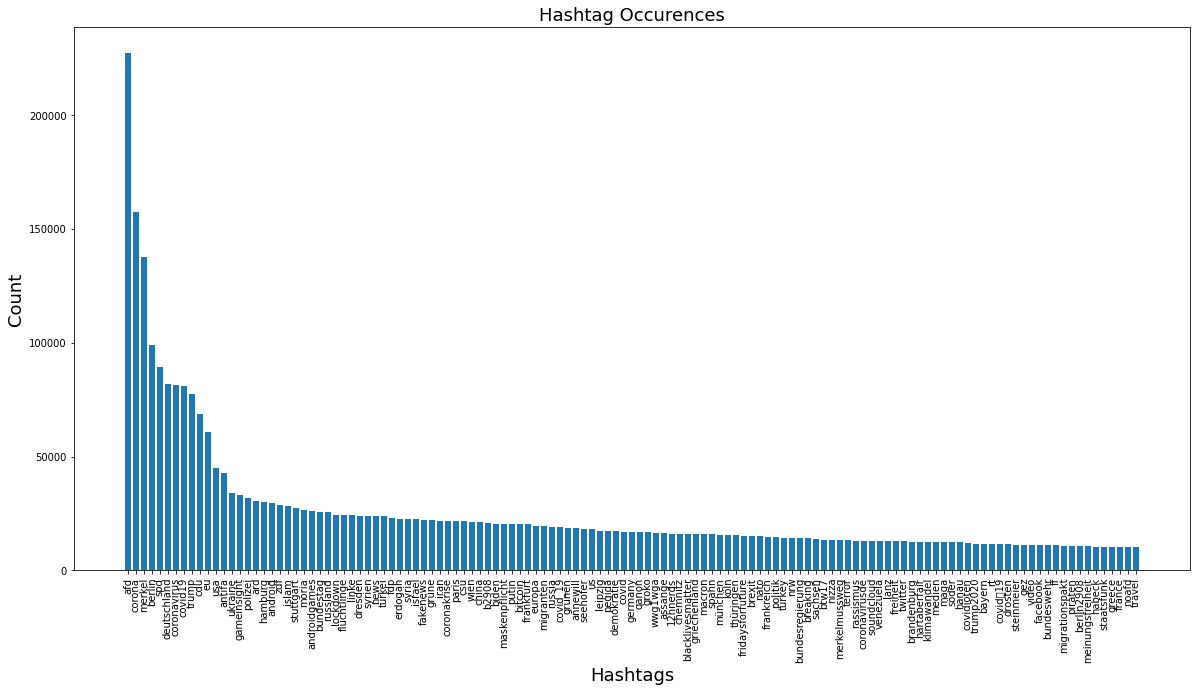

In [17]:
#bar plot popular hashtags
plt.figure(figsize=(20,10))
plt.bar(range(len(df_hashtags_pop['tag'])), df_hashtags_pop['count'])
plt.xticks(range(len(df_hashtags_pop['tag'])), list(df_hashtags_pop['tag']), rotation=90)
plt.title('Hashtag Occurences',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel('Hashtags',fontsize=18)
plt.show()

In [50]:
df_hashtags_pop_10 = df_hashtags_pop.head(10)
df_hashtags_pop_10['hashtag'] = '#' + df_hashtags_pop_10['tag'].str[:]

/tmp/ipykernel_47061/936041241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtags_pop_10['hashtag'] = '#' + df_hashtags_pop_10['tag'].str[:]


In [58]:
#some manually extracted id lists
german_politics = [0, 3, 4, 5, 9, 28, 33, 42, 38, 55, 65, 121, 118, 84, 24, 2, 57, 73, 111]
politics = german_politics + [8, 34, 48, 72, ]
corona = [1, 6, 7, 26, 40, 47, 54, 62, 92, 105, 109]
uselect = [8, 46, 106]

In [88]:
def emphasized_occurence_plot(df, id_list=[], name=''):
    #bar plots top 10 hashtags: different emphasise
    fig = plt.figure(figsize=(13,7))
    ax = plt.bar(range(len(df_hashtags_pop_10['hashtag'])), df_hashtags_pop_10['count']/1000, color='#0b5394')
    plt.xticks(range(len(df_hashtags_pop_10['hashtag'])), list(df_hashtags_pop_10['hashtag']), rotation=90, fontsize=12)
    plt.yticks(fontsize=14)
    plt.ylabel('Count in Thousands',fontsize=14)
    
    if len(id_list) > 0:
        plt.title(f'Top 10 Hashtag Occurences (red = {name})',fontsize=16)
        #emphasize german politics
        for i in id_list:
            try:
                ax.patches[i].set_facecolor('#FF6347')
            except:
                pass
    else:
        plt.title(f'Top 10 Hashtag Occurences',fontsize=16)
  
    return fig

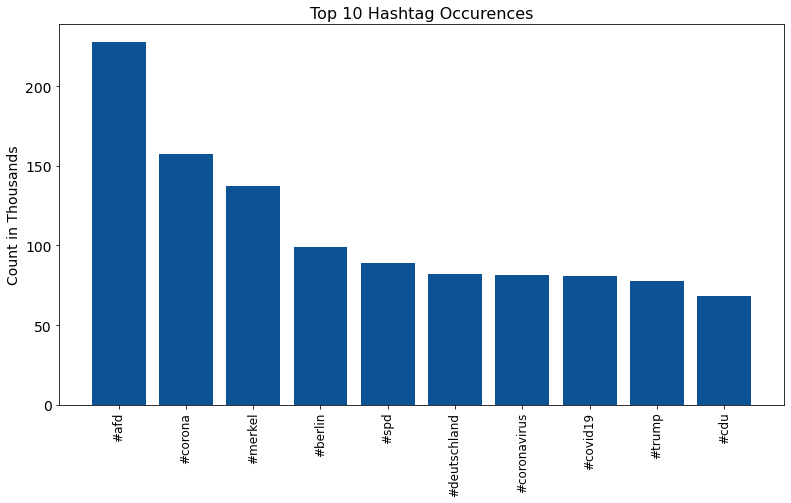

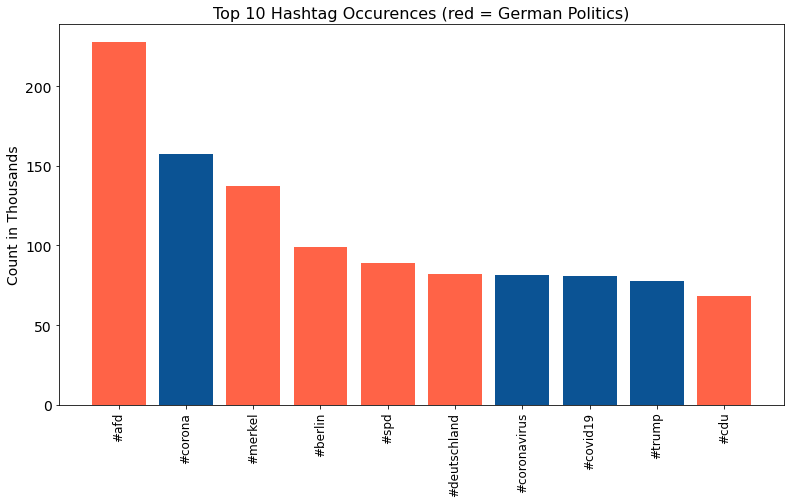

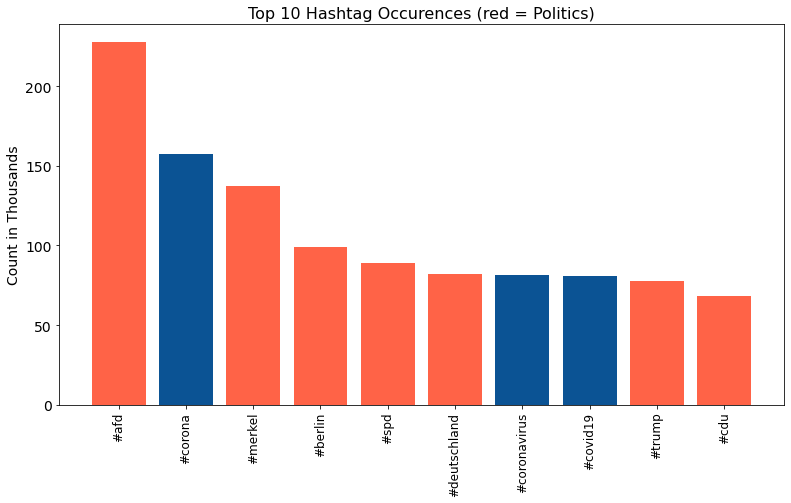

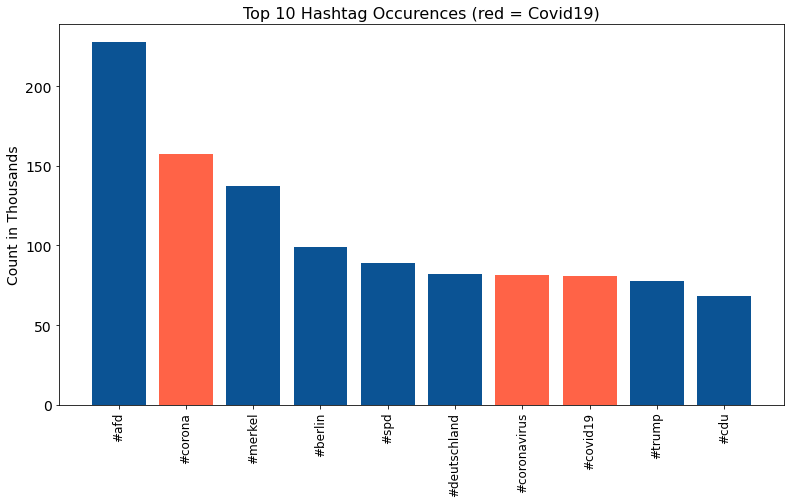

In [89]:
fig = emphasized_occurence_plot(df_hashtags_pop_10)
fig.savefig(os.path.join(plot_path, 'hashtags_top10_occurences.png'))

fig = emphasized_occurence_plot(df_hashtags_pop_10, german_politics, 'German Politics')
fig.savefig(os.path.join(plot_path, 'hashtags_top10_occurences_germanPolitics.png'))
            
fig = emphasized_occurence_plot(df_hashtags_pop_10, politics, 'Politics')
fig.savefig(os.path.join(plot_path, 'hashtags_top10_occurences_politics.png'))

fig = emphasized_occurence_plot(df_hashtags_pop_10, corona, 'Covid19')
fig.savefig(os.path.join(plot_path, 'hashtags_top10_occurences_covid19.png'))


# Popular Conpiracy Theories

In [104]:
consp_5g = []
consp_chemtrails = []
consp_gates = []
consp_biological = []
consp_chinese = []
consp_military = []
consp_gmo = []
consp_deepState = []
consp_pharma = []
for index, tag in df_hashtags.iterrows():
    if '5g' in str(tag['tag']):
        consp_5g.append(tag)
    if 'gates' in  str(tag['tag']):
        consp_gates.append(tag)
    if 'chemtrails' in  str(tag['tag']):
        consp_chemtrails.append(tag)
    if 'chinesevirus' in  str(tag['tag']):
        consp_chinese.append(tag)
    if 'deepstate' in  str(tag['tag']):
        consp_deepState.append(tag)

               tag    count
0               5G   4992.0
1       ChemTrails   2576.0
2      Bill\nGates  12226.0
4  Chinese\n Virus    232.0
6       Deep State   5327.0


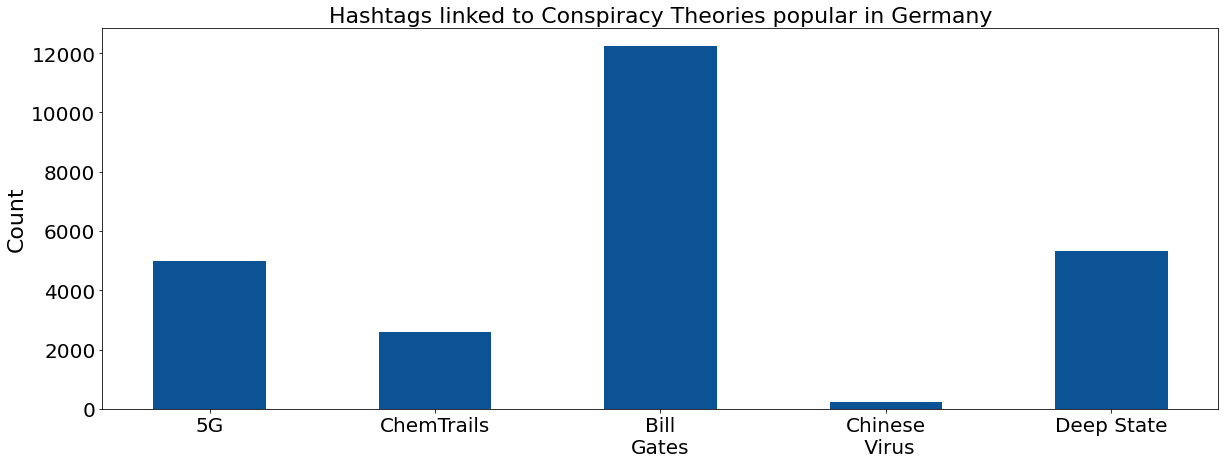

In [108]:
df_consp_5g = pd.DataFrame(consp_5g)
df_consp_chemtrails = pd.DataFrame(consp_chemtrails)
df_consp_gates = pd.DataFrame(consp_gates)
df_consp_biological = pd.DataFrame(consp_biological)
df_consp_chinese = pd.DataFrame(consp_chinese)
df_consp_military = pd.DataFrame(consp_military)
df_consp_gmo = pd.DataFrame(consp_gmo)
df_consp_deepState = pd.DataFrame(consp_deepState)
df_consp_pharma = pd.DataFrame(consp_pharma)
df_consp_hospital = pd.DataFrame(consp_hospital)

df_consp_theories = pd.DataFrame()
df_consp_theories.loc[0, 'tag'] = '5G'
df_consp_theories.loc[0, 'count'] = df_consp_5g['count'].sum(axis=0)
df_consp_theories.loc[1, 'tag'] = 'ChemTrails'
df_consp_theories.loc[1, 'count'] = df_consp_chemtrails['count'].sum(axis=0)
df_consp_theories.loc[2, 'tag'] = 'Bill\nGates'
df_consp_theories.loc[2, 'count'] = df_consp_gates['count'].sum(axis=0)

df_consp_theories.loc[4, 'tag'] = 'Chinese\n Virus'
df_consp_theories.loc[4, 'count'] = df_consp_chinese['count'].sum(axis=0)

df_consp_theories.loc[6, 'tag'] = 'Deep State'
df_consp_theories.loc[6, 'count'] = df_consp_deepState['count'].sum(axis=0)


fig = plt.figure(figsize=(20,7))
print(df_consp_theories)
ax = plt.bar(range(len(df_consp_theories['tag'])), df_consp_theories['count'],  width=0.5, color='#0b5394')
plt.xticks(range(len(df_consp_theories['tag'])), list(df_consp_theories['tag']), fontsize=16)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count', fontsize=22)
plt.title('Hashtags linked to Conspiracy Theories popular in Germany', fontsize=22)

fig.savefig(os.path.join(plot_path, 'hashtags_conspiracy_theories.png'))


# Opinion on Vaccines

In [110]:
#get all hashtags containing word stem of vaccination in german
impf = []
for index, tag in df_hashtags.iterrows():
    if 'impf' in str(tag['tag']):
        impf.append(tag)

In [121]:
# select more popular hashtags (> 100 occurences)
df_impf = pd.DataFrame(impf)
df_impf = df_impf.loc[df_impf['count'] >100]
df_impf = df_impf.sort_values(by=['count'], ascending=False)

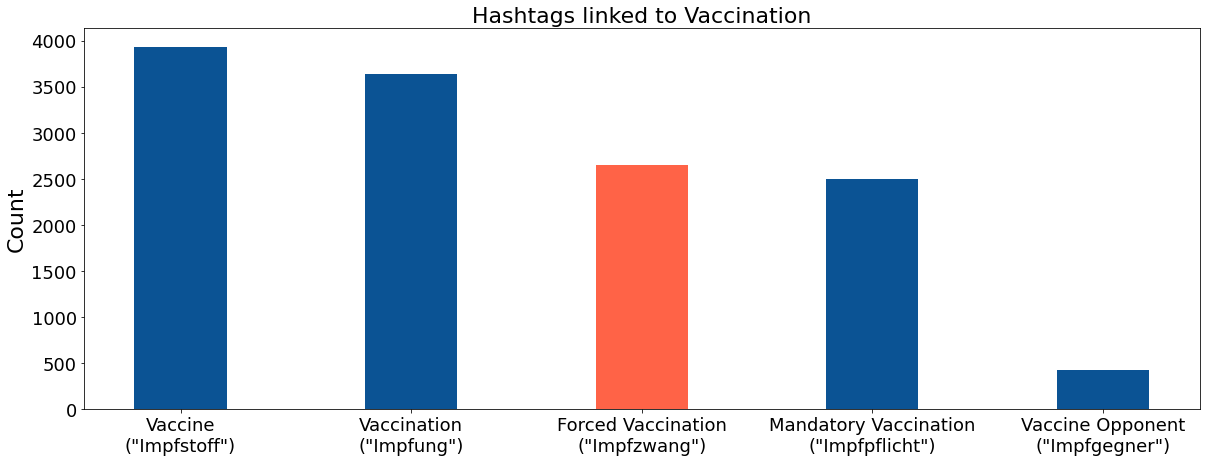

In [120]:
#plot vaccination hashtag distributions (english translation + grouped manually -> same meanings grouped together)

df_impf_plot = pd.DataFrame()
df_impf_plot.loc[0, 'tag'] = 'Vaccine\n(\"Impfstoff\")'
df_impf_plot.loc[0, 'count'] = df_impf.loc[3471, 'count'] + df_impf.loc[21875, 'count'] + df_impf.loc[19326, 'count']
df_impf_plot.loc[1, 'tag'] = 'Mandatory Vaccination\n(\"Impfpflicht\")'
df_impf_plot.loc[1, 'count'] = df_impf.loc[2643, 'count']
df_impf_plot.loc[2, 'tag'] = 'Forced Vaccination\n(\"Impfzwang\")'
df_impf_plot.loc[2, 'count'] = df_impf.loc[10149, 'count'] + df_impf.loc[2642, 'count'] + df_impf.loc[19390, 'count']
df_impf_plot.loc[3, 'tag'] = 'Vaccine Opponent\n(\"Impfgegner\")'
df_impf_plot.loc[3, 'count'] = df_impf.loc[15069, 'count']
df_impf_plot.loc[4, 'tag'] = 'Vaccination\n(\"Impfung\")'
df_impf_plot.loc[4, 'count'] = df_impf.loc[3506, 'count'] + df_impf.loc[10215, 'count'] + df_impf.loc[10383, 'count']
df_impf_plot = df_impf_plot.sort_values(by=['count'], ascending=False)

fig = plt.figure(figsize=(20,7))
ax = plt.bar(range(len(df_impf_plot['tag'])), df_impf_plot['count'],  width=0.4, color='#0b5394')
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=22)
plt.title('Hashtags linked to Vaccination', fontsize=22)
plt.xticks(range(len(df_impf_plot['tag'])), list(df_impf_plot['tag']), fontsize=18)
ax.patches[2].set_facecolor('#FF6347')

fig.savefig(os.path.join(plot_path, 'hashtags_vaccination.png'))
